In [6]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
def pillars(X, k):
    if isinstance(X, pd.DataFrame):
        X = X.values

    n_samples, n_features = X.shape

    # Step 1: Choose the first centroid randomly
    centroids = np.zeros((k, n_features))
    centroids[0] = X[np.random.choice(n_samples)]

    # Step 2: Choose the remaining centroids
    for i in range(1, k):
        distances = np.array([min([np.linalg.norm(x - c) for c in centroids[:i]]) for x in X])
        next_centroid = X[np.argmax(distances)]
        centroids[i] = next_centroid

    return centroids


def perform_clustering(X, k, num_iters, c):
    centroids_history = []  # Menampung nilai centroid pada setiap iterasi
    labels_history = []  # Menampung hasil clustering pada setiap iterasi
    data_count_history = []  # Menampung jumlah data tiap cluster pada setiap iterasi
    centroids = c

    for i in range(num_iters):
        distances = cdist(X, centroids, 'euclidean')
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        centroids_history.append(new_centroids)  # Menambahkan nilai centroid pada setiap iterasi ke dalam list
        labels_history.append(labels)

        # Menghitung jumlah data tiap cluster pada setiap iterasi
        data_count = [np.sum(labels == j) for j in range(k)]
        data_count_history.append(data_count)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    silhouette_avg = silhouette_score(X, labels_history[-1])

    return labels_history, centroids_history, data_count_history, silhouette_avg

# Fungsi untuk optimasi jumlah cluster
def optimize_cluster(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title('Metode Elbow')
    plt.xlabel('Jumlah cluster')
    plt.ylabel('WCSS')
    plt.show()

In [20]:
# Upload Database
from google.colab import files
uploaded = files.upload()

Saving data_rumah.xlsx to data_rumah.xlsx


In [22]:
import pandas as pd

# Membaca file iris.csv
data = pd.read_excel('data_rumah.xlsx')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


Centroids History:
 [array([[7.28099589e+09, 2.73005994e+02, 2.33210789e+02, 4.66433566e+00,
        3.59340659e+00, 1.91508492e+00],
       [4.63333333e+10, 6.69555556e+02, 7.07000000e+02, 5.11111111e+00,
        5.22222222e+00, 2.55555556e+00]]), array([[6.76034412e+09, 2.62090909e+02, 2.23176711e+02, 4.63227783e+00,
        3.56077630e+00, 1.85291113e+00],
       [3.50612903e+10, 7.32838710e+02, 6.87645161e+02, 5.80645161e+00,
        5.09677419e+00, 4.06451613e+00]]), array([[5.92497520e+09, 2.47129828e+02, 2.03428112e+02, 4.57725322e+00,
        3.49785408e+00, 1.73712446e+00],
       [2.79897436e+10, 6.27948718e+02, 6.43743590e+02, 5.75641026e+00,
        4.92307692e+00, 4.11538462e+00]]), array([[5.62711746e+09, 2.41537363e+02, 1.97171429e+02, 4.55274725e+00,
        3.48131868e+00, 1.70659341e+00],
       [2.58460000e+10, 5.95060000e+02, 6.03810000e+02, 5.72000000e+00,
        4.76000000e+00, 3.87000000e+00]]), array([[5.52189444e+09, 2.38938957e+02, 1.95176471e+02, 4.54384018e

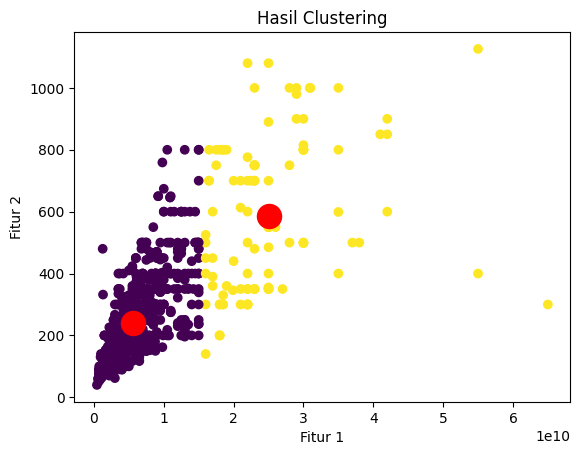

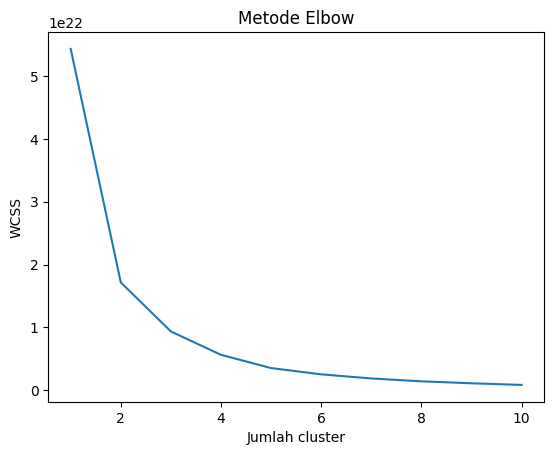

In [25]:
# Memilih kolom yang akan digunakan untuk clustering
X = data.iloc[:, 2:]

# Menentukan jumlah cluster
k = 2

# Memilih centroid awal menggunakan fungsi pillars
initial_centroids = pillars(X, k)

# Melakukan clustering
labels_history, centroids_history, data_count_history, silhouette_avg = perform_clustering(X, k, 100, initial_centroids)

# Menampilkan hasil clustering
print("Centroids History:\n", centroids_history)
print("Labels History:\n", labels_history)
print("Data Count History:\n", data_count_history)
print("Silhouette Score:", silhouette_avg)

# Visualisasi hasil clustering
final_labels = labels_history[-1]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=final_labels, cmap='viridis')
plt.scatter(centroids_history[-1][:, 0], centroids_history[-1][:, 1], s=300, c='red')
plt.title('Hasil Clustering')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.show()

# Optimasi jumlah cluster
optimize_cluster(X)